In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Predictive Maintenance Dataset

We will first import the csv dataset of the predictive maintenance dataset. This dataset can be found and downloaded in [Kaggle](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?resource=download)

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


This dataset has two outputs which are 'Target' and 'Failure Type'. In this project, we are only interested in the 'Failure Type' and therefore, the column 'Target' will be removed to avoid confusion or being accidentally included in the features.

In [3]:
df = df.drop('Target', axis=1)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


# Training and Test Dataset

Now, it is time to define the inputs and output of this dataset while also splitting them into training and test datasets

In [4]:
train, test = train_test_split(df.iloc[:,3:], test_size=0.2)

In [5]:
x_train = train.drop(columns="Failure Type")
y_train = train["Failure Type"]

x_test = test.drop(columns="Failure Type")
y_test = test["Failure Type"]

After they are split into training and test datasets, the features would need to be scaled as the difference in magnitude of values for each feature are quite large to one another.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_scale = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
x_train[to_scale] = scaler.fit_transform(x_train[to_scale])
x_test[to_scale] = scaler.fit_transform(x_test[to_scale])

In [7]:
x_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6427,0.532609,0.506173,0.146542,0.622928,0.063241
3485,0.717391,0.629630,0.151817,0.600829,0.363636
698,0.250000,0.382716,0.217468,0.497238,0.284585
3345,0.652174,0.617284,0.249707,0.412983,0.679842
1762,0.315217,0.234568,0.171161,0.613260,0.806324
...,...,...,...,...,...
5677,0.760870,0.753086,0.066237,0.656077,0.241107
8736,0.217391,0.370370,0.189332,0.497238,0.442688
4674,0.880435,0.716049,0.144197,0.560773,0.280632
8191,0.467391,0.641975,0.270809,0.353591,0.814229


# Defining the hyperparameters

The machine learning model being used for this project is the k-nearest neighbor and the hyperparameters that we want to tune are stated below

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors": list(range(1,21)),
    "leaf_size": list(range(15,45)),
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Hyperparameter Tuning And Results

Hyperparameter tuning is done with GridSeach. To evaluate the performance of the model, we will be looking at the accuracy of the predictions as well as its confusion matrix. The reason for using a confusion matrix is that we want to see how minor are the false negatives generated by the model. The fewer the false negatives, the better. In this case, the false negatives are when the prediction is a failure while the true answer is 'No Failure'

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, conf_matrix

In [10]:
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, grid_params, cv=5)
accuracy, conf_matrix = fit_model(gs, x_train, x_test, y_train, y_test)
print(f"Accuracy of the best model: {accuracy}")
print(f"Best model: {gs.best_estimator_}")

Accuracy of the best model: 0.9685
Best model: KNeighborsClassifier(leaf_size=15, n_neighbors=11)


From the results shown, the optimised hyperparameters are n_neighbors = 11, leaf_size = 15 and algoritm = 'auto'. This results in an accuracy of 96.85%. Moreover, a confusion matrix of the results was generated. Although most of the 'No Failure' were correctly predicted, there are still some failures incorrectly predicted as 'No Failure' which is a problem for the industry as these machines would not receive maintenance in time and may result in permanent damage.

As a result, the next project would be focusing on how to reduce this problem. 

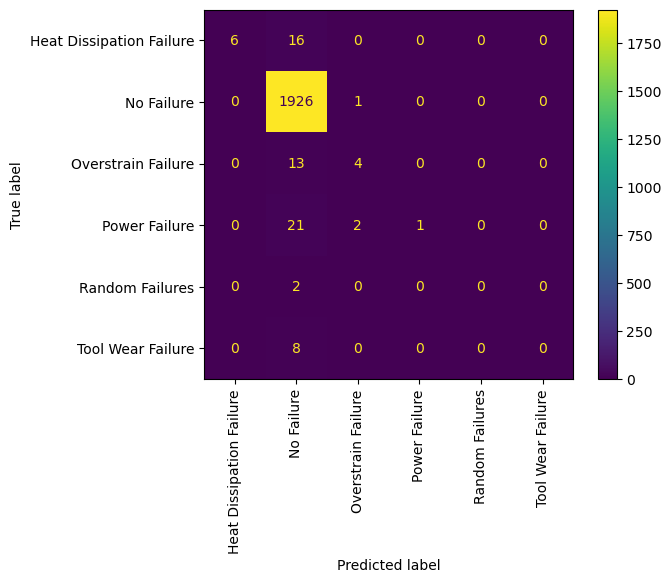

In [11]:
ConfusionMatrixDisplay(conf_matrix, display_labels=gs.classes_).plot(xticks_rotation='vertical')